## **QUESTION 1**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile

In [ ]:
# Download data and unzip
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"
response = requests.get(url)

with open("complaints.zip", "wb") as f:
    f.write(response.content)

with zipfile.ZipFile("complaints.zip", "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv("complaints.csv")

<ipython-input-3-2c85fa61122d>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
2,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
3,2024-05-02,Credit card,Store credit card,Fees or interest,Unexpected increase in interest rate,NaN,NaN,"Colony Brands, Inc.",CA,93702,NaN,NaN,Web,2024-05-02,Closed with explanation,Yes,NaN,8902079
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",GA,30213,NaN,Consent provided,Web,2024-01-26,Closed with explanation,Yes,NaN,8231458


In [ ]:
print("Shape of the data: ",df.shape)

Shape of the data:  (5159721, 18)


In [ ]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159721 entries, 0 to 5159720
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 708.

In [ ]:
#Finding null values
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        734985
Consumer complaint narrative    3345316
Company public response         2687808
Company                               0
State                             45588
ZIP code                          30225
Tags                            4677247
Consumer consent provided?      1024020
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4391405
Complaint ID                          0
dtype: int64

In [ ]:
# Replace null values in a categorical column with the mode
columns_to_fill = ['Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative','Company public response','State', 'ZIP code', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Consumer disputed?']  # Specify columns to fill

for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Calculate mode value for the column
    df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode value

In [ ]:
df.isna().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [ ]:
#Finding duplicated values
df[df.duplicated()].shape

(0, 18)

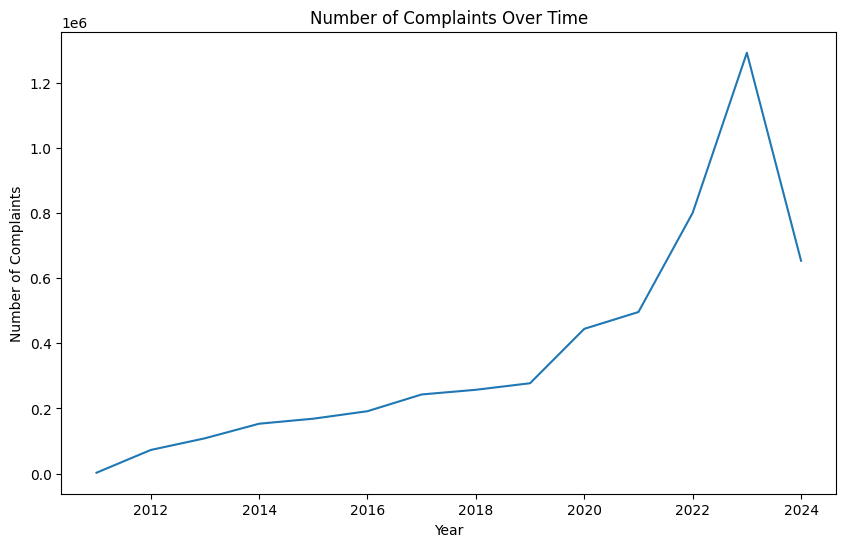

In [ ]:
# Analyze the frequency of complaints over time
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year
complaints_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=complaints_by_year.index, y=complaints_by_year.values)
plt.title('Number of Complaints Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.show()

# INSIGHTS


*   IN 2023 THE NUMBER OF COMPLAINTS IS THE HIGHEST AND 2013 IS THE LOWEST
*   IN 2021 THERE WAS A SIGNIFICANT INCREASE IN THE COMPLAINT



Unique product categories: 21


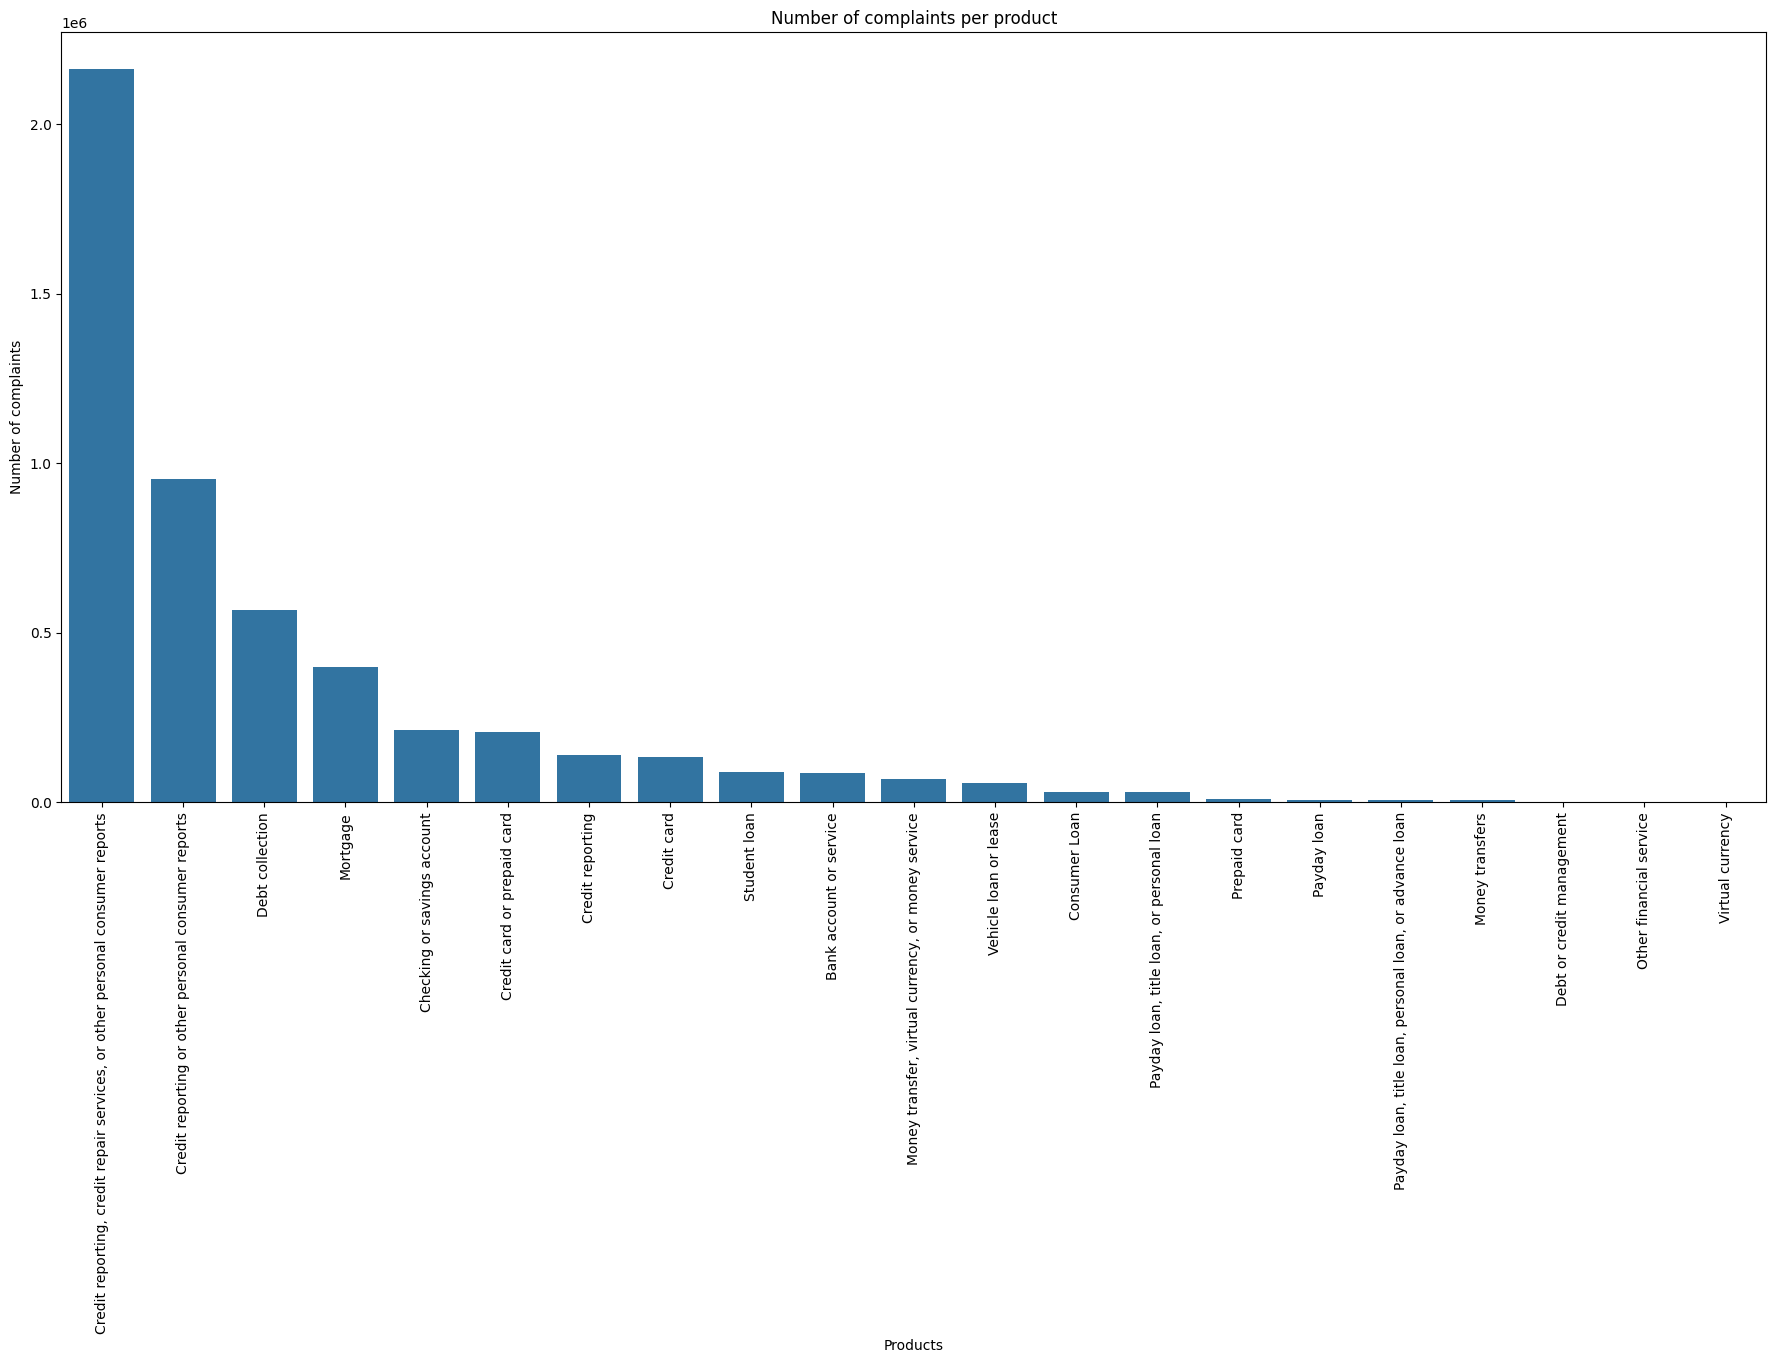

In [ ]:
# Number of complaints per product

print("Unique product categories:", df["Product"].nunique())

n_complaints_per_product = df['Product'].value_counts()

# Plot using seaborn
plt.figure(figsize=(22, 10))
sns.barplot(x=n_complaints_per_product.index, y=n_complaints_per_product.values)
plt.title('Number of complaints per product')
plt.xlabel('Products')
plt.ylabel('Number of complaints')
plt.xticks(rotation=90)
plt.show()

# INSIGHTS


*   CREDIT REPORTING, CREDIT REPAIR SERVICES, OR OTHER PERSONEL CONSUMER REPORTS HAS HIGHEST NUMBER OF COMPLAINTS
*   VIRTUAL CURRENCY HAS THE LOWEST NUMBER OF COMPLAINTS

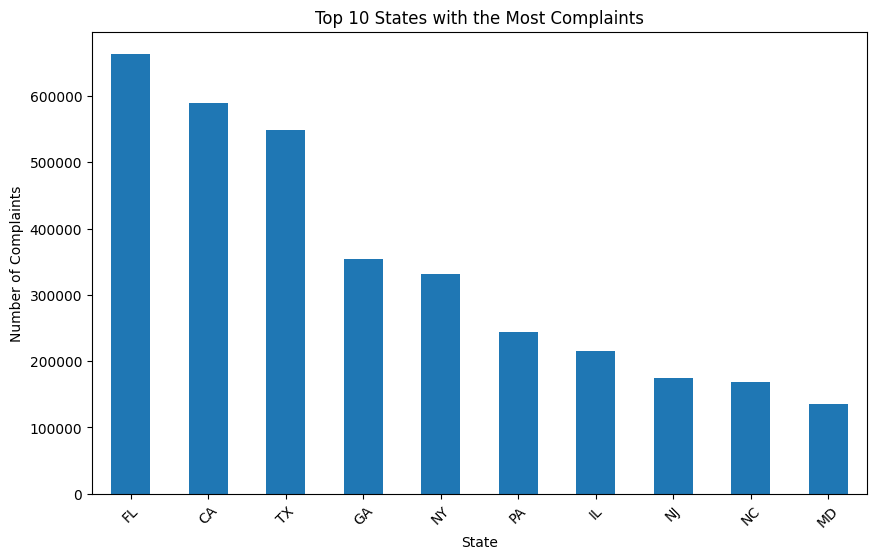

In [ ]:
#Top 10 States with the Most Complaints
# Count complaints per state
complaints_per_state = df['State'].value_counts()

# Sort states based on number of complaints
sorted_states = complaints_per_state.sort_values(ascending=False)

# Select top 6 states
top_10_states = sorted_states.head(10)

# Plot bar graph
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar')
plt.title('Top 10 States with the Most Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS


*   FLORIDA STATE HAS THE HIGHEST NUMBER OF COMPLAINTS
*   MARYLAND HAS THE LOWEST NUMBER OF COMPLAINTS



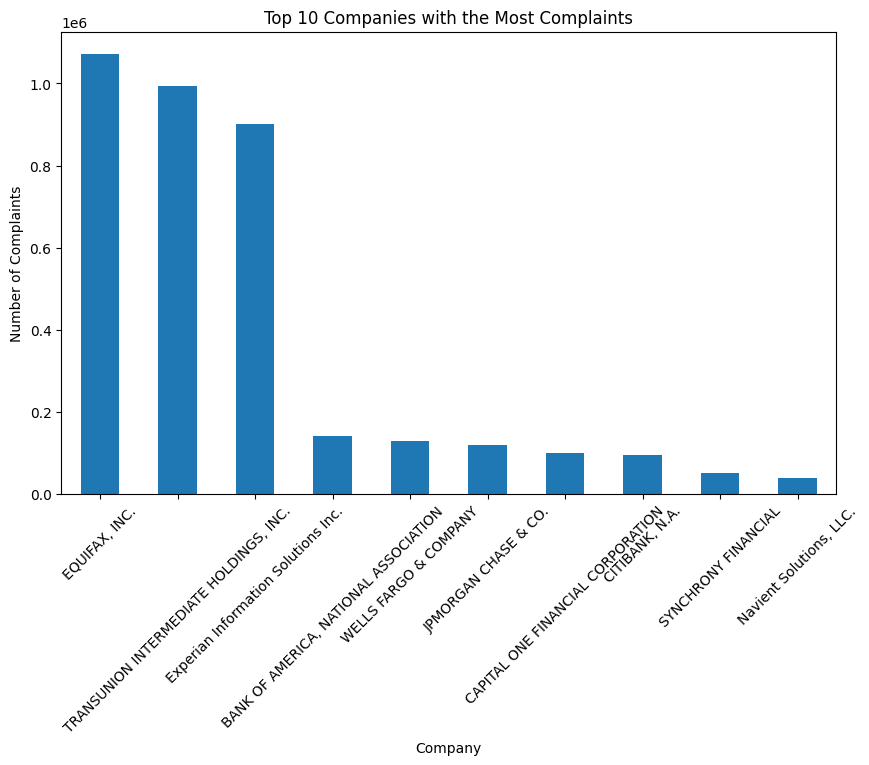

In [ ]:
#Top 10 Companies with the Most Complaints(add threshold by SLA)
# Count complaints per company
complaints_per_company = df['Company'].value_counts()

# Sort companies based on number of complaints
sorted_companies = complaints_per_company.sort_values(ascending=False)

# Select top 10 companies
top_10_companies = sorted_companies.head(10)

# Plot bar graph
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Top 10 Companies with the Most Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS


*   THE COMPANY EQUIFAX, INC HAS HIGHEST NUMBER OF COMPLAINTS
*   THE COMPANY NAVIENT SOLUTIONS, LLC HAS THE LOWEST NUMBER OF COMPLAINTS

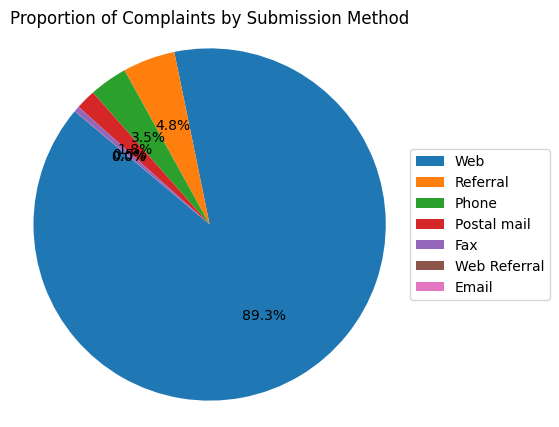

In [ ]:
#Proportion of Complaints by Submission Method
# Count complaints
submitted_via_counts = df['Submitted via'].value_counts()

# percentage of complaints
percentages = submitted_via_counts / submitted_via_counts.sum() * 100

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Proportion of Complaints by Submission Method' )
plt.axis('equal')

# legends
plt.legend(labels=percentages.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# INSIGHTS


*   THROUGH WEB THE NUMBER OF COMPLAINTS IS THE HIGHEST


In [ ]:
# Most common products and sub-products associated with complaints
product_counts = df['Product'].value_counts()
subproduct_counts = df['Sub-product'].value_counts()

In [ ]:
product_counts

Product
Credit reporting, credit repair services, or other personal consumer reports    2163878
Credit reporting or other personal consumer reports                              952973
Debt collection                                                                  566391
Mortgage                                                                         397729
Checking or savings account                                                      212250
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      132715
Student loan                                                                      87994
Bank account or service                                                           86205
Money transfer, virtual currency, or money service                                68290
Vehicle loan or lease   

## **QUESTION 2**

In [ ]:
def findLongestConseqSubseq(arr, n):

    ans = 0
    count = 0

    # Sort the array
    arr.sort()

    v = []

    v.append(arr[0])

    # Insert repeated elements only
    # once in the vector
    for i in range(1, n):
        if (arr[i] != arr[i - 1]):
          v.append(arr[i])

    # Find the maximum length
    # by traversing the array
    for i in range(len(v)):

        # Check if the current element is
        # equal to previous element +1
        if (i > 0 and v[i] == v[i - 1] + 1):
            count += 1

        # Reset the count
        else:
            count = 1

        # Update the maximum
        ans = max(ans, count)

    return ans


# Driver code
input_string = input("Enter unsorted array of integers: ")

# Split the input string into a list of integers
arr = list(map(int, input_string.split()))

# Sort the array
arr.sort()

# Find the longest consecutive subsequence
longest_subsequence = findLongestConseqSubseq(arr, len(arr))

# Print the result
print("Length of the Longest contiguous subsequence is", longest_subsequence)

Enter unsorted array of integers: 1 3 5 4 7
Length of the Longest contiguous subsequence is 3


## **QUESTION 3**

In [ ]:
# User input for list of non-negative integers
nums = list(map(int, input("Enter space-separated non-negative integers: ").split()))

# Sort the numbers based on custom comparator
nums.sort(key=lambda x: (str(x), str(x)[-1]), reverse=True)

# Join the sorted numbers to form the largest number
largest_num = ''.join(map(str, nums))

# Remove leading zeros if any
largest_num = largest_num.lstrip('0')

# If the number is empty after removing leading zeros, return '0'
largest_num = largest_num if largest_num else '0'

# Output the result
print("Output:", largest_num)

Enter space-separated non-negative integers: 10 2
Output: 210


## **QUESTION 4**

In [ ]:
import json
import csv

# Read the JSON file
with open('/content/DT A1 sample_json (1) (1).json', 'r') as f:
    data = json.load(f)

# Extract "servlet-name" and "servlet-class" from each object
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in data['web-app']['servlet']]

# Extracted data to a CSV file
with open('servlet_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['servlet-name', 'servlet-class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for servlet in servlet_data:
        writer.writerow({'servlet-name': servlet[0], 'servlet-class': servlet[1]})

In [ ]:
# load Extracted data
data_set = pd.read_csv("servlet_data.csv")
data_set

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet
